# Candidate 1: Laplacian Smoothing

In this section, we create a running example which will be used in the rest of the tutorial to introduce various testing and reasoning techniques.

Laplacian smoothing is a simple and commonly used technique in scientific computing and data processing. It is often employed to reduce noise and improve the quality of data by averaging the values of neighboring points....


# Candidate 2: 2-D Box Filter

Description:

You're smoothing a gridded data (e.g., temperature). A common approach is a **local box average**: replace each point by the mean of its surrounding $K \times K$ neighborhood including itself.

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

In [51]:
arr = xr.tutorial.open_dataset("air_temperature").air.isel(time=0).values

In [52]:
type(arr)

numpy.ndarray

In [53]:
arr.shape

(25, 53)

In [58]:
arr = xr.tutorial.open_dataset("air_temperature").air.isel(time=0).values

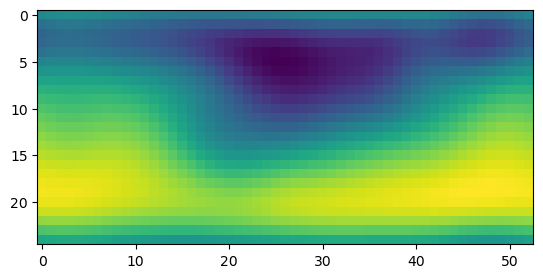

In [68]:
plt.imshow(arr)

In [69]:
def apply_box_filter(arr):
    arr_filtered = arr.copy()
    ni, nj = arr.shape
    for i in range(ni):
        for j in range(nj):
            arr_filtered[i,j] = \
                arr[i-1,j-1]      + arr[i,j-1]      + arr[(i+1)%ni,j-1] + \
                arr[i-1,j]        + arr[i,j]        + arr[(i+1)%ni,j] + \
                arr[i-1,(j+1)%nj] + arr[i,(j+1)%nj] + arr[(i+1)%ni,(j+1)%nj]
    return arr_filtered


In [70]:
for i in range(10):
    arr = apply_box_filter(arr)

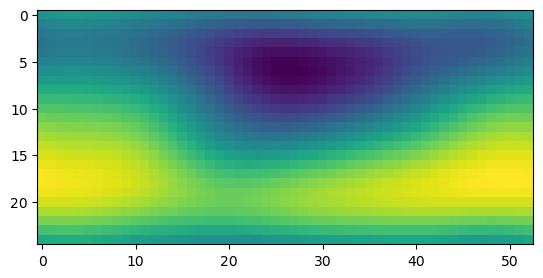

In [71]:
plt.imshow(arr)

In [ ]:
apply